In [230]:
import pandas as pd

In [231]:
data = 'usUni.csv'

In [232]:
raw = pd.read_csv(data)

In [233]:
raw.head()

,Unnamed: 0,rank_order,rank,name,scores_overall,scores_overall_rank,scores_resources,scores_resources_rank,scores_engagement,scores_engagement_rank,...,Physics & Astronomy,Geography,"History, Philosophy & Theology",Mathematics & Statistics,Business & Management,Other Health,Archaeology,Education,Veterinary Science,Sport Science
0,0,1,1,Harvard University,93.9,1,29.9,2,17.6,14,...,1,1,1,1,1,1,1,1,0,0
1,1,2,2,Massachusetts Institute of Technology,91.8,2,29.2,3,16.5,189,...,1,0,1,1,1,1,1,0,1,0
2,2,3,3,Yale University,91.3,3,26.7,13,17.5,26,...,1,0,1,1,1,1,1,1,0,0
3,3,4,4,University of Pennsylvania,90.4,4,27.0,10,16.9,104,...,1,1,1,1,1,1,1,1,1,1
4,4,5,=5,California Institute of Technology,90.2,5,29.9,1,14.8,665,...,1,0,1,1,1,0,0,0,0,0


In [234]:
keys = raw.iloc[0, :].keys()

In [235]:
raw.location.unique()

array(['Massachusetts', 'Connecticut', 'Pennsylvania', 'California',
       'New Jersey', 'Rhode Island', 'New York', 'North Carolina',
       'Illinois', 'New Hampshire', 'Maryland', 'Texas', 'Tennessee',
       'Missouri', 'Georgia', 'Michigan', 'District of Columbia',
       'Indiana', 'Vermont', 'Minnesota', 'Washington', 'Maine',
       'Florida', 'Virginia', 'Ohio', 'Iowa', 'Wisconsin', 'Oregon',
       'Louisiana', 'Colorado', 'Utah', 'Nebraska', 'Arizona', 'Delaware',
       'South Carolina', 'Kentucky', 'Alabama', 'Oklahoma', 'Kansas',
       'Wyoming', 'Hawaii', 'Nevada', 'Mississippi', 'Arkansas', 'Alaska',
       'South Dakota', 'Idaho', 'Montana', 'New Mexico', 'North Dakota',
       'West Virginia'], dtype=object)

In [236]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_app")

In [237]:
location = geolocator.geocode('Massachusetts')

In [238]:
census_region = pd.read_csv('us census bureau regions and divisions.csv')

In [239]:
census_region.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [240]:
census_region.Region.unique()

array(['West', 'South', 'Northeast', 'Midwest'], dtype=object)

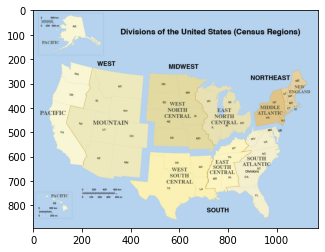

In [241]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('Map-of-US-Census-Regions-and-Divisions.jpg'))

In [242]:
def get_region(sub_reg):
    for re, sts in regions.items():
        if sub_reg in sts:
            return re
    raise ValueError('Region not exists in database')

In [243]:
uni_region = [census_region[census_region.State == lo].Region for lo in raw.location]


In [244]:
uni_region = [x.values[0] for x in uni_region]
raw['Region'] = uni_region

In [245]:
raw.Region

0      Northeast
1      Northeast
2      Northeast
3      Northeast
4           West
         ...    
796      Midwest
797    Northeast
798      Midwest
799    Northeast
800      Midwest
Name: Region, Length: 801, dtype: object

In [246]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [247]:
data_to_bar = raw[['name', 'scores_overall', 'Region']]
color_dict = {'West':'red', 'South':'green', 'Northeast':'blue', 'Midwest':'yellow'}
data_to_bar['map_color'] = [color_dict[x] for x in data_to_bar.Region]

In [252]:
data_to_bar = data_to_bar.iloc[0:500,:]
data_to_bar.sort_values('scores_overall', inplace=True, ascending=True)


Text(0.5, 1.0, 'Bar plot in Ascending Order with Matplotlib')

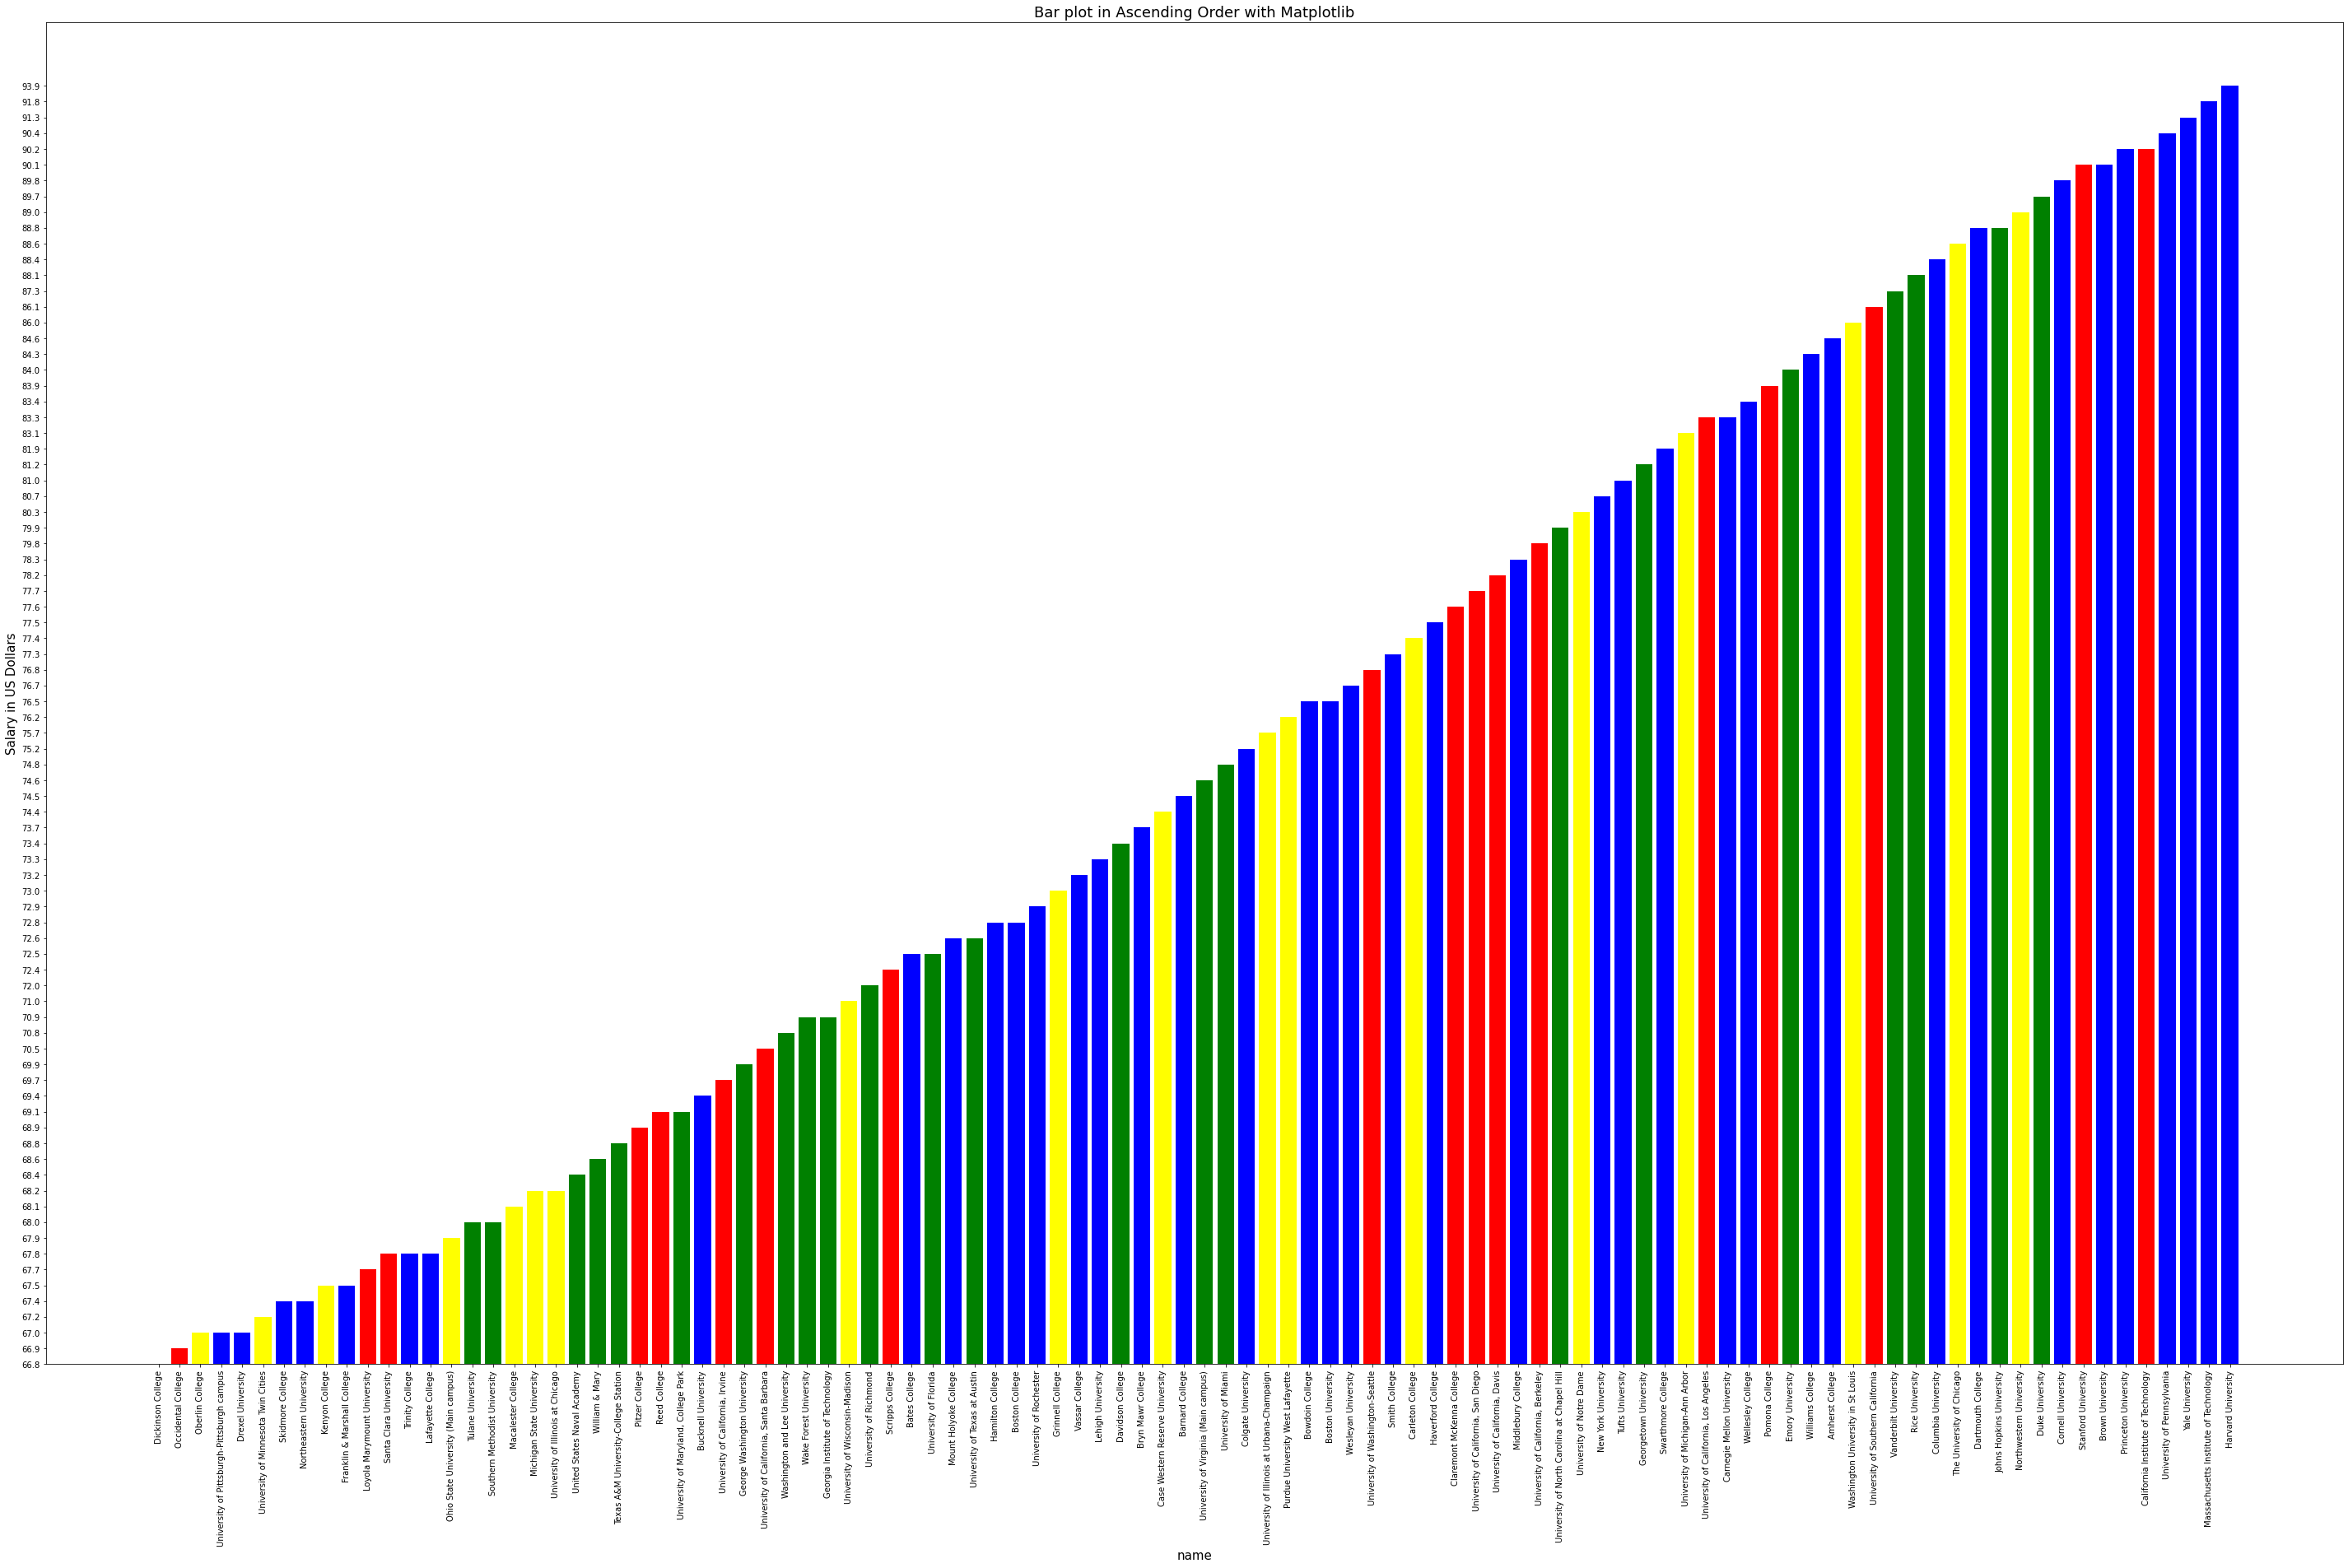

In [257]:
plt.figure(figsize=(50,30))
# bar plot with matplotlib
plt.bar('name', 'scores_overall',data=data_to_bar, color=data_to_bar.map_color)
plt.xlabel("name", size=15)
plt.xticks(rotation=90)
plt.ylabel("Salary in US Dollars", size=15)
plt.title("Bar plot in Ascending Order with Matplotlib", size=18)

#plt.savefig("bar_plot_matplotlib_ascending_order_Python.png")